# 1) Data Source and Contents

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, accuracy_score, roc_curve, auc
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [0]:
census = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

# 2) Data Quality Analysis

In [3]:
census.head()
#read the first 5 data
census.shape
#display the number of total rows and columns
census.info()
#display number of non-null objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
hours_per_week_bin    48842 non-null object
occupation_bin        48842 non-null object
msr_bin               48842 non-null object
capital_gl_bin        48842 non-null object
race_sex_bin          48842 non-null object
education_num_bin     48842 non-null object
education_bin         48842 non-null object
workclass_bin         48842 non-null object
age_bin               48842 non-null object
flag                  48842 non-null object
y                     48842 non-null int64
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [4]:
census.describe()
#display descriptive statistics of y

y
count  48842.000000
mean       0.239282
std        0.426649
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

# 3) Exploratory Data Analysis

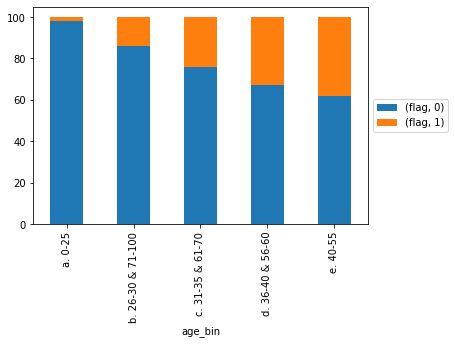

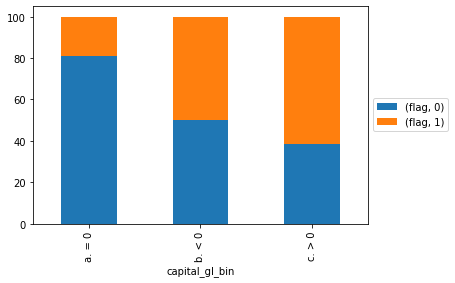

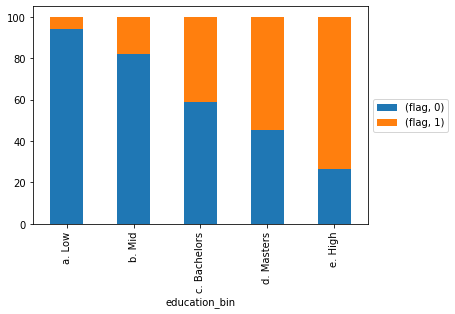

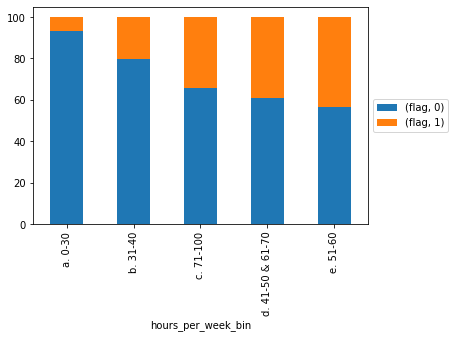

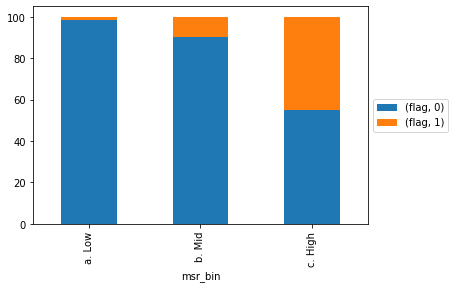

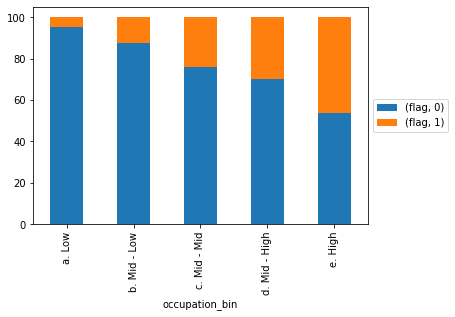

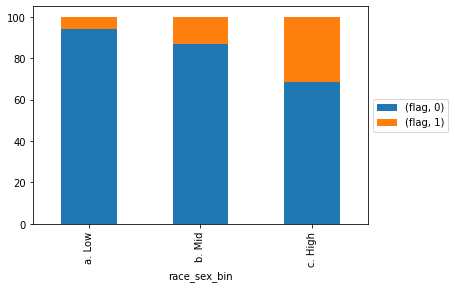

In [5]:
#create a stacked bargraph for income (y) based on the 7 variables
#age_bin
x_chart = census.pivot_table(values=['flag'], index=['age_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#capital_gl_bin
x_chart = census.pivot_table(values=['flag'], index=['capital_gl_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#education_bin
x_chart = census.pivot_table(values=['flag'], index=['education_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#hours_per_week_bin
x_chart = census.pivot_table(values=['flag'], index=['hours_per_week_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#msr_bin
x_chart = census.pivot_table(values=['flag'], index=['msr_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#occupation_bin
x_chart = census.pivot_table(values=['flag'], index=['occupation_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#race_sex_bin
x_chart = census.pivot_table(values=['flag'], index=['race_sex_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 4) Decision Tree Classifier Model

In [0]:
#split the data into training and testing dataset
variables = ['age_bin', 'capital_gl_bin', 'education_bin', 'hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']
x_train = census.loc[census['flag']=='train',variables]
y_train = census.loc[census['flag']=='train','y']
x_train = pd.get_dummies(x_train, columns=variables, drop_first=True)

x_test = census.loc[census['flag']=='test',variables]
y_test = census.loc[census['flag']=='test','y']
x_test = pd.get_dummies(x_test, columns=variables, drop_first=True)

In [7]:
#build the first model using gini 
dtree = DecisionTreeClassifier(max_depth=10, random_state=101,
                               max_features = None, min_samples_leaf = 15)
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)

import time
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.743171691894531e-05 seconds ---


# 5) Visualize Using Graphviz

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.886673 to fit



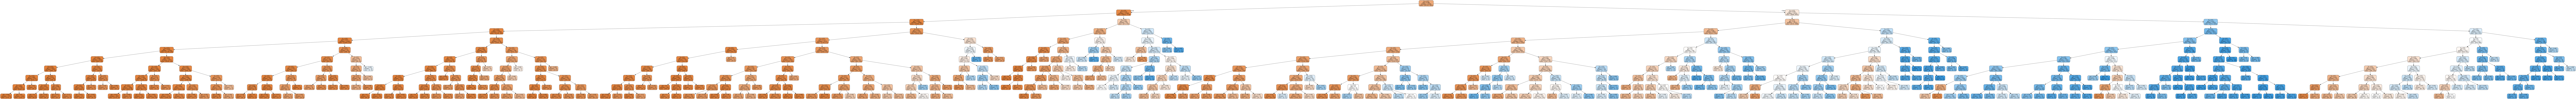

In [8]:
#visualize the tree model
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# 6) Evaluate Performance

In [9]:
#calculate and display the following: 
#Confusion Matrix
print(confusion_matrix(y_test, y_pred))
#Accuracy, Recall, Precision, F-1 Score (only look at result of 1)
print(classification_report(y_test,y_pred))
#AUC (Area Under the Curve)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

[[11521   914]
 [ 1653  2193]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.83      0.84      0.84     16281



0.7483502983062628

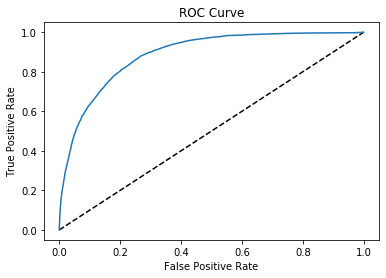

In [10]:
# plot the ROC curve
y_pred = dtree.predict_proba(x_test)[:,1]
fpr, tpr, thresholds= roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 7) Tune Decision Tree Performance

In [11]:
#Hyperparameter Tuning 1
dtree_gini_2 = DecisionTreeClassifier(criterion='gini',max_depth=20, random_state=101,
                               max_features = None, min_samples_leaf = 5)
dtree_gini_2.fit(x_train,y_train)
y_pred=dtree_gini_2.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

[[11496   939]
 [ 1686  2160]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.70      0.56      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281



0.7430548995180555

In [12]:
#Hyperparameter Tuning 2
dtree_gini_3 = DecisionTreeClassifier(criterion='gini',max_depth=20, random_state=101,
                               max_features = None, min_samples_leaf = 1)
dtree_gini_3.fit(x_train,y_train)
y_pred=dtree_gini_3.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

[[11484   951]
 [ 1724  2122]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.69      0.55      0.61      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.75     16281
weighted avg       0.83      0.84      0.83     16281



0.7376321928631066

In [13]:
#Hyperparameter Tuning 3
dtree_gini_4 = DecisionTreeClassifier(criterion='gini',max_depth=5, random_state=101,
                               max_features = None, min_samples_leaf = 15)
dtree_gini_4.fit(x_train,y_train)
y_pred=dtree_gini_4.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

[[11655   780]
 [ 2015  1831]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     12435
           1       0.70      0.48      0.57      3846

    accuracy                           0.83     16281
   macro avg       0.78      0.71      0.73     16281
weighted avg       0.82      0.83      0.82     16281



0.7066764335229622

In [14]:
#Hyperparameter Tuning 4
dtree_entropy_1 = DecisionTreeClassifier(criterion='entropy',max_depth=10, random_state=101,
                               max_features = None, min_samples_leaf = 15)
dtree_entropy_1.fit(x_train,y_train)
y_pred=dtree_entropy_1.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

[[11530   905]
 [ 1660  2186]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.83      0.84      0.84     16281



0.7478021436900901

In [15]:
#Hyperparameter Tuning 5
dtree_entropy_2 = DecisionTreeClassifier(criterion='entropy',max_depth=20, random_state=101,
                               max_features = None, min_samples_leaf = 5)
dtree_entropy_2.fit(x_train,y_train)
y_pred=dtree_entropy_2.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

[[11503   932]
 [ 1696  2150]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.70      0.56      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281



0.7420363111267515

In [16]:
#Hyperparameter Tuning 6
dtree_entropy_3 = DecisionTreeClassifier(criterion='entropy',max_depth=20, random_state=101,
                               max_features = None, min_samples_leaf = 1)
dtree_entropy_3.fit(x_train,y_train)
y_pred=dtree_entropy_3.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

[[11476   959]
 [ 1723  2123]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.69      0.55      0.61      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.75     16281
weighted avg       0.83      0.84      0.83     16281



0.7374405253652848

In [17]:
#Hyperparameter Tuning 7
dtree_entropy_4 = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=101,
                               max_features = None, min_samples_leaf = 15)
dtree_entropy_4.fit(x_train,y_train)
y_pred=dtree_entropy_4.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

[[11628   807]
 [ 1995  1851]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     12435
           1       0.70      0.48      0.57      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.71      0.73     16281
weighted avg       0.82      0.83      0.82     16281



0.7081908921712718

# 8) Conclusion
The first gini tree (default) is the best tree due to its AUC score 